# **<center><b>Caso Cancer de Mama - KNN with/without PCA</b></center>**

##<h2><b>1. Preparacion del Modelo</b></h2>

### <center><h2><b>1.1. Importar Librerias</b></h2></center>

In [29]:
# Import Cancer de mama Dataset
from sklearn.datasets import load_breast_cancer

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Import other libraries
import numpy as np
import matplotlib.pyplot as plt

### <h2><b>1.2. Cargar y realizar el escalamiento del dataset Cancer de Mama</b></h2>

In [30]:
# Load Data from Cancer de Mama Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaler = StandardScaler()
X_scaled_pca = scaler.fit_transform(X)

##<h2><b>2. Entrenamiento del modelo</b></h2>

### <h2><b>2.1. División entre Test and Training Data <b></h2>

In [31]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### <h2><b>2.2. Escalamiento y Reducción de Dimensiones <b></h2>

In [32]:
# PCA debe aplicarse solo sobre el training set
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca_scaled = PCA()
X_pca = pca_scaled.fit_transform(X_scaled_pca)

### <h2><b>2.3. Realizar Predicciones sin PCA <b></h2>

In [33]:
# K-NN without PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_no_pca = accuracy_score(y_test, y_pred)
f1_no_pca = f1_score(y_test, y_pred)

### <h2><b>2.4. Realizar Predicciones con PCA <b></h2>

In [34]:
# K-NN with PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

## <h2><b>3. Evaluación de métricas <b></h2>

In [35]:
# Make predictions
metrics = {
    "Exactitud sin PCA": accuracy_score(y_test, y_pred),
    "F1-score sin PCA": f1_score(y_test, y_pred),
    "Exactitud con PCA (10 componentes)": accuracy_score(y_test, y_pred_pca),
    "F1-score con PCA (10 componentes)": f1_score(y_test, y_pred_pca)
}

print("Model Metrics:")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")


varianza = pca_scaled.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza) # con 9 componentes ya se alcanza el 95%

# Determinar número de componentes para el 95% de varianza
# 95% es para un modelado sin mucha pérdida de información relevante (a veces 99% ó 90%)
n_componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1

Model Metrics:
Exactitud sin PCA: 0.9474
F1-score sin PCA: 0.9577
Exactitud con PCA (10 componentes): 0.9561
F1-score con PCA (10 componentes): 0.9650


## <h2><b>4. Visualizaciones <b></h2>

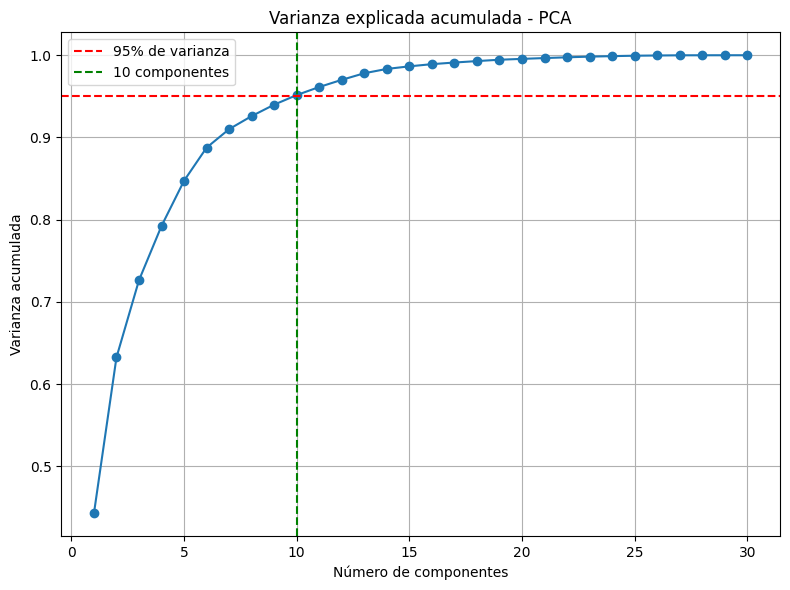

# de componentes principales (varianza 95%) 10


In [36]:
# Graficar
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de varianza')
plt.axvline(x=n_componentes_95, color='g', linestyle='--', label=f'{n_componentes_95} componentes')
plt.title('Varianza explicada acumulada - PCA')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("# de componentes principales (varianza 95%)", n_componentes_95)